In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from google.colab import files

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import Lasso, Ridge, LinearRegression

# **Data preprocessing**



In [ ]:
uploaded = files.upload()
df = pd.read_csv("CAR.csv")
df.name = df.name.str.split().str.get(0)
df

Saving CAR.csv to CAR (1).csv


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda,2014,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...
4335,Hyundai,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai,2016,865000,90000,Diesel,Individual,Manual,First Owner


In [ ]:
pd.unique(df.name), pd.unique(df['fuel']), pd.unique(df['seller_type']), pd.unique(df['transmission']), pd.unique(df['owner'])

(array(['Maruti', 'Hyundai', 'Datsun', 'Honda', 'Tata', 'Chevrolet',
        'Toyota', 'Jaguar', 'Mercedes-Benz', 'Audi', 'Skoda', 'Jeep',
        'BMW', 'Mahindra', 'Ford', 'Nissan', 'Renault', 'Fiat',
        'Volkswagen', 'Volvo', 'Mitsubishi', 'Land', 'Daewoo', 'MG',
        'Force', 'Isuzu', 'OpelCorsa', 'Ambassador', 'Kia'], dtype=object),
 array(['Petrol', 'Diesel', 'CNG', 'LPG', 'Electric'], dtype=object),
 array(['Individual', 'Dealer', 'Trustmark Dealer'], dtype=object),
 array(['Manual', 'Automatic'], dtype=object),
 array(['First Owner', 'Second Owner', 'Fourth & Above Owner',
        'Third Owner', 'Test Drive Car'], dtype=object))

In [ ]:
df_encoded = pd.get_dummies(df, columns=['name', 'fuel', 'seller_type', 'transmission', 'owner'])
df_encoded[['km_driven']] = MinMaxScaler().fit_transform(df_encoded[['km_driven']])
df_encoded['year'] = 2023 - df_encoded['year']
df_encoded

,year,selling_price,km_driven,name_Ambassador,name_Audi,name_BMW,name_Chevrolet,name_Daewoo,name_Datsun,name_Fiat,...,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Automatic,transmission_Manual,owner_First Owner,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,16,60000,0.086783,0,0,0,0,0,0,0,...,0,1,0,0,1,1,0,0,0,0
1,16,135000,0.061988,0,0,0,0,0,0,0,...,0,1,0,0,1,1,0,0,0,0
2,11,600000,0.123976,0,0,0,0,0,0,0,...,0,1,0,0,1,1,0,0,0,0
3,6,250000,0.057028,0,0,0,0,0,1,0,...,0,1,0,0,1,1,0,0,0,0
4,9,450000,0.174807,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4335,9,409999,0.099181,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
4336,9,409999,0.099181,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
4337,14,110000,0.102900,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
4338,7,865000,0.111579,0,0,0,0,0,0,0,...,0,1,0,0,1,1,0,0,0,0


# **Linear Regression**

In [ ]:
coef = [0.1, 0.5, 1, 2, 5, 10]
x, y = df_encoded.loc[:, df_encoded.columns != 'selling_price'], df_encoded['selling_price']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Classic linear regression

In [ ]:
regression = LinearRegression()
regression.fit(x_train, y_train)


print(mean_absolute_error(y_test, regression.predict(x_test)))
#print(mean_squared_error(y_test, regression.predict(x_test)))

regression.coef_

185155.60159593096


array([-3.85987908e+04, -8.12943745e+05, -5.08446777e+05,  5.37230276e+05,
        1.63995635e+06, -6.66793693e+05, -2.61934474e-09, -7.06617964e+05,
       -6.43698810e+05, -7.47459299e+05, -4.84974918e+05, -4.65083622e+05,
       -5.30258915e+05,  2.54649080e+05,  9.30974839e+05,  3.33471783e+05,
       -3.19399389e+05,  2.55685238e+06,  4.48988833e+05, -4.39069307e+05,
       -5.56437593e+05,  1.59800427e+06, -3.95666940e+04, -5.45920651e+05,
       -3.17323211e+05, -6.29876718e+05, -5.54649474e+05, -6.38162854e+05,
       -9.26920717e+04, -5.67640190e+05,  1.15394434e+06,  3.88440832e+04,
        2.34344519e+05, -4.19339540e+05,  9.65351866e+04,  4.96157519e+04,
       -7.84212929e+04, -1.03551487e+05,  1.81972780e+05,  1.52606830e+05,
       -1.52606830e+05, -1.99523373e+04,  2.64743629e+03, -5.39124109e+04,
        1.21415901e+05, -5.01985891e+04])

# Lasso

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.026e+11, tolerance: 1.187e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.044e+11, tolerance: 1.187e+11
  model = cd_fast.enet_coordinate_descent(


<Axes: xlabel='coef', ylabel='mae'>

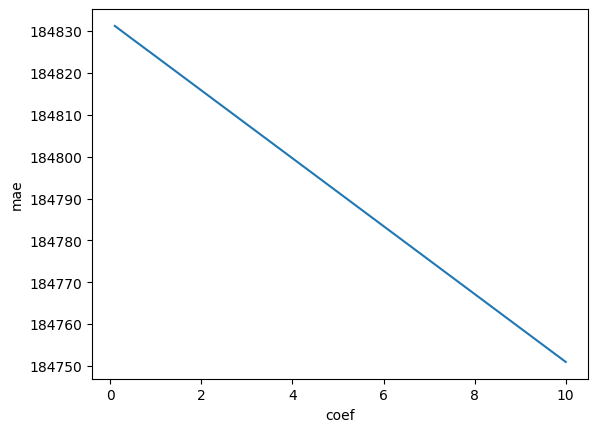

In [ ]:
collect_mae = []
for a in coef:
  lasso = Lasso(a, max_iter = 10000)
  lasso.fit(x_train, y_train)
  mae = mean_absolute_error(y_test, lasso.predict(x_test))
  collect_mae.append((mae, a))
lasso_mae = pd.DataFrame(collect_mae, columns = ['mae', 'coef'])
sns.lineplot(lasso_mae, x='coef', y='mae')

In [ ]:
lasso.coef_

array([-3.86324825e+04, -8.08059282e+05, -3.43543807e+04,  1.00053456e+06,
        2.10297529e+06, -2.01633551e+05,  0.00000000e+00, -2.40451881e+05,
       -1.77383116e+05, -2.47618117e+05, -1.98077320e+04, -0.00000000e+00,
       -6.52708705e+04,  6.84900453e+05,  1.38824361e+06,  7.86931373e+05,
        1.10118248e+05,  3.00922118e+06,  8.96187045e+05,  2.56169602e+04,
       -9.14205390e+04,  2.06109406e+06,  4.19104894e+05, -8.03625213e+04,
        1.12822342e+05, -1.64598758e+05, -8.94137747e+04, -1.73117364e+05,
        3.71497587e+05, -1.02505455e+05,  1.60907382e+06, -9.83754786e+03,
        1.84683532e+05, -4.34099849e+05,  4.49350785e+04,  0.00000000e+00,
       -0.00000000e+00, -2.51915257e+04,  2.59855249e+05,  3.06095373e+05,
       -5.04272363e-10,  0.00000000e+00,  2.19432406e+04, -3.40346301e+04,
        1.38877811e+05, -3.00111873e+04])

# Ridge

<Axes: xlabel='coef', ylabel='mae'>

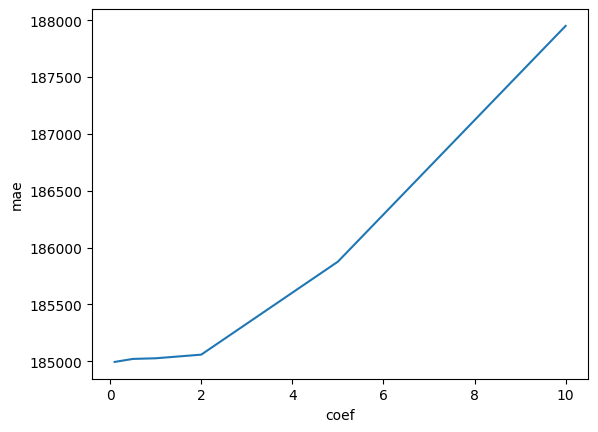

In [ ]:
collect_mae = []
for a in coef:
  ridge = Ridge(a, max_iter = 10000)
  ridge.fit(x_train, y_train)
  mae = mean_absolute_error(y_test, ridge.predict(x_test))
  collect_mae.append((mae, a))

ridge_mae = pd.DataFrame(collect_mae, columns = ['mae', 'coef'])
sns.lineplot(ridge_mae, x='coef', y='mae')

In [ ]:
ridge.coef_

array([-4.01492673e+04, -3.71115519e+05, -8.08060012e+04,  4.58881736e+05,
        1.26446691e+06, -4.37826784e+05,  0.00000000e+00, -3.63933113e+05,
       -3.15553627e+05, -4.80722335e+04, -2.80960407e+05, -2.61513854e+05,
       -3.26897946e+05,  4.23410227e+04,  3.23727733e+05,  1.27925937e+05,
       -2.44381640e+04,  5.92901983e+05,  9.48221710e+04, -2.46398066e+05,
       -3.46478544e+05,  1.23569532e+06,  3.69211995e+04, -2.92497662e+05,
       -8.83737152e+03, -3.89204043e+05, -3.54759379e+05, -4.22778740e+05,
        5.82580033e+04, -3.66637246e+05,  3.31651166e+05, -4.35369202e+04,
        1.46327219e+05, -5.71232026e+04,  1.25542429e+03, -4.69225201e+04,
       -5.48062726e+04, -9.92483081e+04,  1.54054581e+05,  2.40309397e+05,
       -2.40309397e+05, -2.45897687e+03,  5.77078223e+03, -4.34307111e+04,
        8.13715464e+04, -4.12526406e+04])